### Compare generated GP models with literature models

In [1]:
from caat import SNModel
from caat.utils import ROOT_DIR, WLE
import os
import pickle as pkl
import matplotlib.pyplot as plt

Configuration file not found:

    /Users/craigpellegrino/.dustmapsrc

To create a new configuration file in the default location, run the following python code:

    from dustmaps.config import config
    config.reset()

Note that this will delete your configuration! For example, if you have specified a data directory, then dustmaps will forget about its location.


In [2]:
# Load Khakpash+24 model grid
with open(os.path.join(ROOT_DIR, "data", "comparison_models", "Khakpash24", "all_templates.pkl"), 'rb') as f:
    u = pkl._Unpickler(f)
    u.encoding = 'latin1'
    tmpl = u.load()

# Generate multi-D GP model
snmodel = SNModel(
    surface="SESNe_SNIIb_GP_model.fits"
)

bands_to_plot = ["w1", "U", "B", "V", "g", "rp", "ip"]
sntype = "IIb"

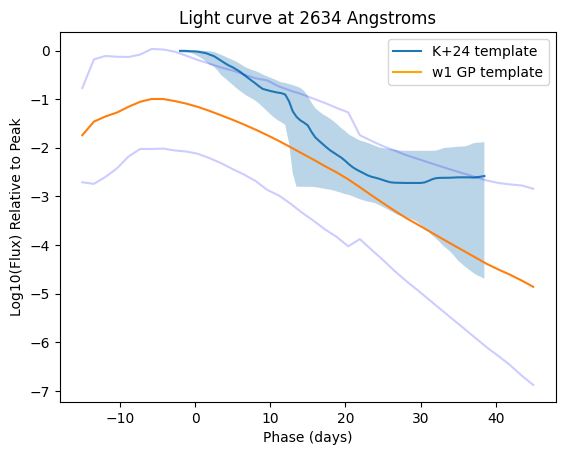

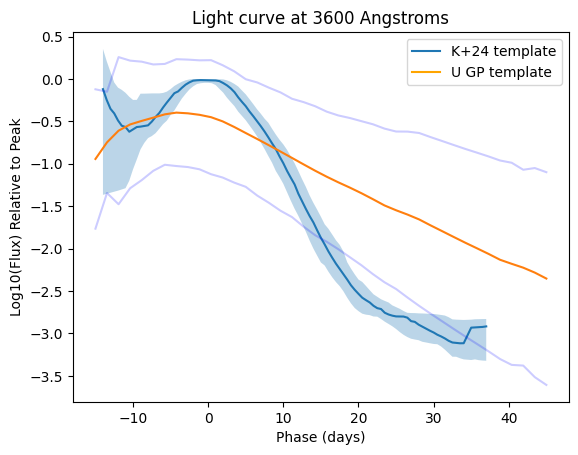

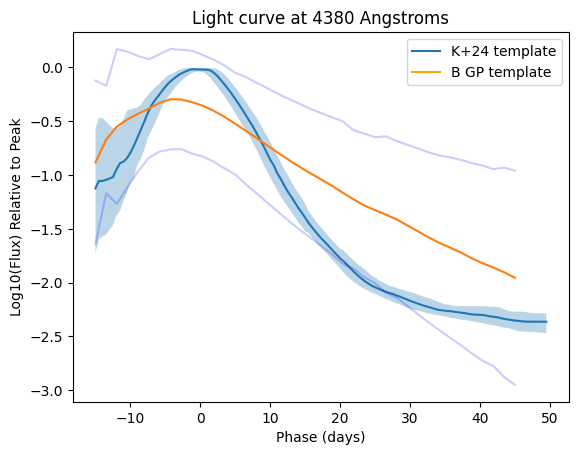

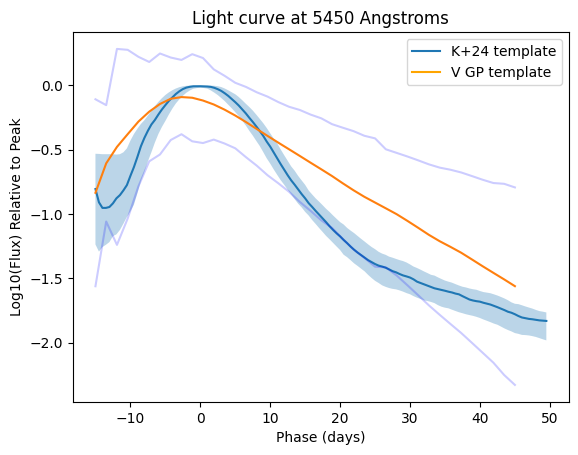

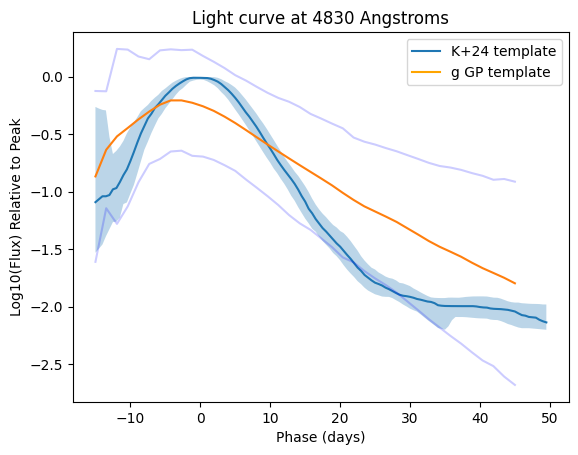

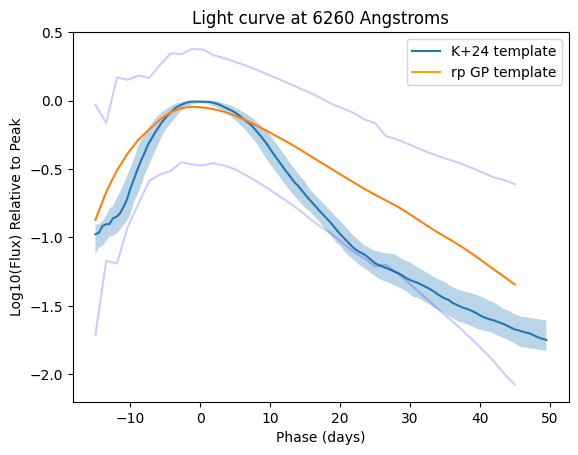

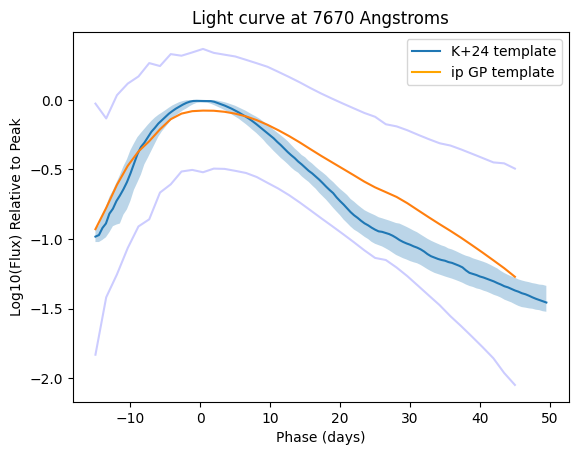

In [3]:
for band in bands_to_plot:
    _, ax = plt.subplots()
    ax.plot(tmpl[band][sntype]['t'], tmpl[band][sntype]['rollingMedian'], label="K+24 template")
    ax.fill_between(
        tmpl[band][sntype]['t'],
        tmpl[band][sntype]['rollingPc25'],
        tmpl[band][sntype]['rollingPc75'],
        alpha=0.3,
    )

    if band in ["w2", "m2", "w1"]:
        caat_band = "UV" + band.upper()
    else:
        caat_band = band[0]
    snmodel.predict_lightcurve(-15.0, 45.0, WLE[caat_band], show=False)
    plt.plot([], [], color='orange', label=f"{band} GP template")
    plt.legend()
    plt.show()

There are a few points to note about the discrepancies between these models:

1. One obvious difference is the size of the uncertainty region--our model predictions seem to have much larger uncertainties than the Khakpash+24 models. However, it's important to note that the uncertainty plotted for our models corresponds to $\pm$ 2 $\sigma$ from the median (or roughly a 95% confidence region), whereas the shaded region for the Khakpash+24 corresponds to the 25th and 75th percentile regions. Furthermore, the uncertainty in our final models is calculated by sampling repeatedly from the uncertainty region in each individual model fit done on our training sample, whereas the uncertainty in the Khakpash + 24 models is the spread between each sample object's model prediction.

2. Another obvious difference is an offset in flux for some filter predictions, most notably in the bluer filters. This is because our flux measurements are all relative to the peak flux as close to the V/g filter as we could measure. However, the Khakpash + 24 models normalize the flux to the peak _in each filter_, meaning that each model peaks at 0. 

3. Finally, the slopes, particularly at late times, differ slightly. While more nuanced, this is likely a combination of the multi-dimensional fitting of our models (where predictions in one filter are affected by measurements in adjacent filters), the relative difference in fluxes from one filter to the next (which is not as prevalent in the single filter fitting done by Khakpash + 24), and physical affects such as reddening which each model may be treating differently.